 Data Preprocessing and Exploratory Data Analysis Mini project

Rashika Saraf-22070126084
Rishith Rawat-22070126088
Shambhavi patil-220701126103


University Reccomendation System

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

Loading the dataset

In [ ]:
df=pd.read_csv("/content/colleges_data (3) final.csv")
df.head()

,college_name,location,course_fees,review,rank,Average Package,Highest Package,Cutoff rank in CSE
0,IIT Madras - Indian Institute of Technology - ...,"Chennai, Tamil Nadu","₹ 2,09,550",8.7 / 10,#3rd/131 in India 2023,2148000.0,19800000.0,144
1,IIT Delhi - Indian Institute of Technology [II...,"New Delhi, Delhi NCR","₹ 2,54,650",8.7 / 10,#1st/35 in India 2023,1760000.0,20000000.0,115
2,IIT Bombay - Indian Institute of Technology - ...,"Mumbai, Maharashtra","₹ 2,29,300",8.8 / 10,#2nd/35 in India 2023,2182000.0,36700000.0,66
3,"RNS Institute of Technology - [RNSIT], Bangalore","Bangalore, Karnataka","₹ 1,16,765",7.7 / 10,#251th/300 in India 2021,550000.0,5600000.0,7554
4,IIT Kharagpur - Indian Institute of Technology...,"Kharagpur, West Bengal","₹ 2,23,600",8.7 / 10,#4th/35 in India 2023,4565874.0,26000000.0,261


In [ ]:
df.shape

(1988, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   college_name        1988 non-null   object 
 1   location            1988 non-null   object 
 2   course_fees         1988 non-null   object 
 3   review              1944 non-null   object 
 4   rank                569 non-null    object 
 5   Average Package     1196 non-null   float64
 6   Highest Package     1228 non-null   float64
 7   Cutoff rank in CSE  1988 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 124.4+ KB


In [ ]:
df.describe()

,Average Package,Highest Package,Cutoff rank in CSE
count,1.196000e+03,1.228000e+03,1.988000e+03
mean,5.277391e+05,2.323453e+06,9.843278e+04
std,4.890888e+05,2.645168e+06,8.158501e+04
min,2.950000e+04,1.000000e+05,6.600000e+01
25%,3.500000e+05,1.000000e+06,3.935400e+04
50%,4.215000e+05,1.600000e+06,9.078300e+04
75%,5.407500e+05,2.700000e+06,1.484928e+05
max,9.500000e+06,3.670000e+07,1.040525e+06


Data Preprocessing

Checking for missing values

In [ ]:
df.isna().sum()

college_name             0
location                 0
course_fees              0
review                  44
rank                  1419
Average Package        792
Highest Package        760
Cutoff rank in CSE       0
dtype: int64

In [ ]:
round(df.isnull().sum() / df.shape[0] * 100.00,2)

college_name           0.00
location               0.00
course_fees            0.00
review                 2.21
rank                  71.38
Average Package       39.84
Highest Package       38.23
Cutoff rank in CSE     0.00
dtype: float64

Data cleaning

In [ ]:
df['course_fees'] = df['course_fees'].astype(str)

# Remove rupees symbol ('₹') and commas from the 'course_fees' column
df['course_fees'] = df['course_fees'].str.replace('₹', '').str.replace(',', '')

In [ ]:
def extract_review_rating(review_string):
    if isinstance(review_string, str):
        try:
            return float(review_string.split(' / ')[0])
        except ValueError:
            return None  # Handle non-numeric values gracefully (e.g., if the string doesn't contain ' / ')
    else:
        return None  # Handle non-string values gracefully

# Apply the extraction function to the 'review' column
df['review'] = df['review'].apply(extract_review_rating)

In [ ]:
df.head()

,college_name,location,course_fees,review,rank,Average Package,Highest Package,Cutoff rank in CSE
0,IIT Madras - Indian Institute of Technology - ...,"Chennai, Tamil Nadu",209550,8.7,#3rd/131 in India 2023,2148000.0,19800000.0,144
1,IIT Delhi - Indian Institute of Technology [II...,"New Delhi, Delhi NCR",254650,8.7,#1st/35 in India 2023,1760000.0,20000000.0,115
2,IIT Bombay - Indian Institute of Technology - ...,"Mumbai, Maharashtra",229300,8.8,#2nd/35 in India 2023,2182000.0,36700000.0,66
3,"RNS Institute of Technology - [RNSIT], Bangalore","Bangalore, Karnataka",116765,7.7,#251th/300 in India 2021,550000.0,5600000.0,7554
4,IIT Kharagpur - Indian Institute of Technology...,"Kharagpur, West Bengal",223600,8.7,#4th/35 in India 2023,4565874.0,26000000.0,261


In [ ]:
df.isna().sum()

college_name             0
location                 0
course_fees              0
review                 231
rank                  1419
Average Package        792
Highest Package        760
Cutoff rank in CSE       0
dtype: int64

Handling Missing Values

In [ ]:
mean_review = df['review'].mean()
df['review'].fillna(mean_review, inplace=True)

In [ ]:
df.isna().sum()

college_name             0
location                 0
course_fees              0
review                   0
rank                  1419
Average Package        792
Highest Package        760
Cutoff rank in CSE       0
dtype: int64

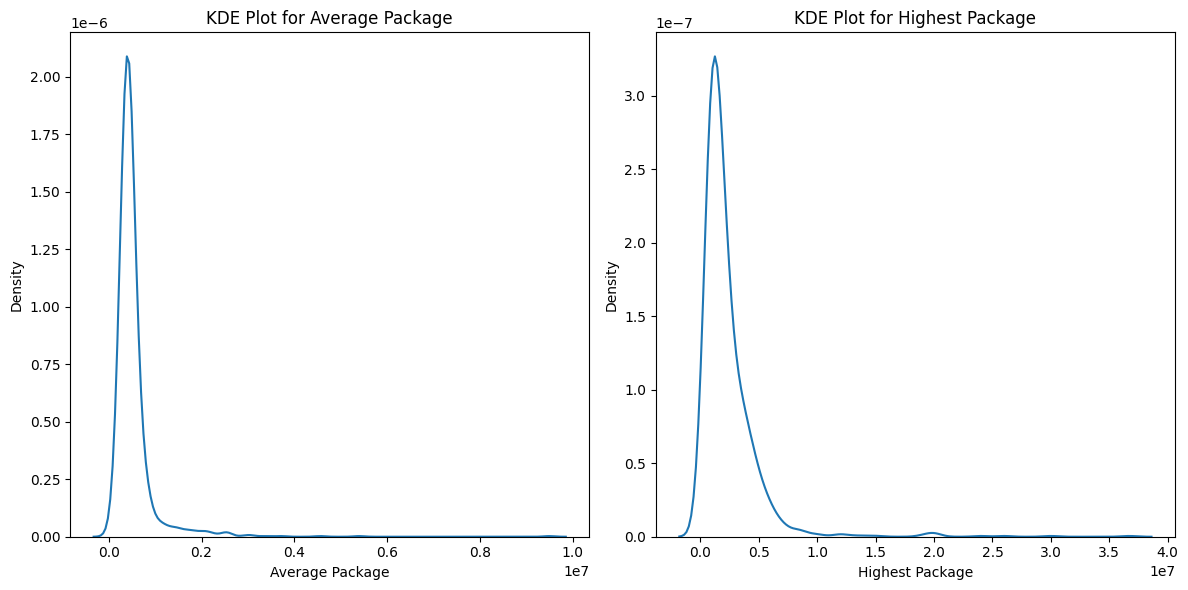

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df'

# Create a figure with a 1x2 grid
plt.figure(figsize=(12, 6))

# Plot the KDE for Average Package
plt.subplot(1, 2, 1)
sns.kdeplot(df['Average Package'][pd.notnull(df['Average Package'])])
plt.title('KDE Plot for Average Package')

# Plot the KDE for Highest Package
plt.subplot(1, 2, 2)
sns.kdeplot(df['Highest Package'][pd.notnull(df['Highest Package'])])
plt.title('KDE Plot for Highest Package')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


Using KNN Imputation to fill missing values in average and highest package

In [ ]:
#importing the library
from sklearn.impute import KNNImputer

In [ ]:
knn_imputer = KNNImputer(n_neighbors=4) #defining nearest neighbors to 4

In [ ]:
column_to_impute = 'Average Package'
column_data = df[[column_to_impute]]

# Performing KNN imputation on the specified column
imputed_column = knn_imputer.fit_transform(column_data)

# Replace the original column in the DataFrame with the imputed values
df[column_to_impute] = imputed_column


In [ ]:
#KNN imputation for highest package column
column_impute = 'Highest Package'
columnn_data = df[[column_impute]]

imputedd_column = knn_imputer.fit_transform(columnn_data)

# Replace the original column in the DataFrame with the imputed values
df[column_impute] = imputedd_column


In [ ]:
#dropping the column rank
df = df.drop(columns=['rank'])


In [ ]:
df.isna().sum()

college_name          0
location              0
course_fees           0
review                0
Average Package       0
Highest Package       0
Cutoff rank in CSE    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988 entries, 0 to 1987
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   college_name        1988 non-null   object 
 1   location            1988 non-null   object 
 2   course_fees         1988 non-null   object 
 3   review              1988 non-null   float64
 4   Average Package     1988 non-null   float64
 5   Highest Package     1988 non-null   float64
 6   Cutoff rank in CSE  1988 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 108.8+ KB


In [ ]:
#converting objects and float datatype to integer
# List of columns to convert
columns_to_convert = ["course_fees", "Average Package", "Highest Package",]

# Loop through the specified columns
for column in columns_to_convert:
    # Convert the column to integers, handling non-integer values and missing values
    df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')

    # Fill missing values with a specific integer
    df[column].fillna(150000, inplace=True)  # Fill missing values with mean

    # Convert the column to integer data type
    df[column] = df[column].astype(int)

# Check the data types of the columns to verify the conversion
print(df.dtypes)


college_name           object
location               object
course_fees             int64
review                float64
Average Package         int64
Highest Package         int64
Cutoff rank in CSE      int64
dtype: object


In [ ]:
df.describe()

,course_fees,review,Average Package,Highest Package,Cutoff rank in CSE
count,1.988000e+03,1988.000000,1.988000e+03,1.988000e+03,1.988000e+03
mean,1.040018e+05,7.453557,5.277391e+05,2.323453e+06,9.843278e+04
std,8.790948e+04,0.810304,3.792912e+05,2.078627e+06,8.158501e+04
min,8.000000e+02,2.100000,2.950000e+04,1.000000e+05,6.600000e+01
25%,5.500000e+04,7.200000,4.000000e+05,1.250000e+06,3.935400e+04
50%,7.932500e+04,7.500000,5.277390e+05,2.323452e+06,9.078300e+04
75%,1.212525e+05,7.900000,5.277390e+05,2.323452e+06,1.484928e+05
max,1.300000e+06,9.800000,9.500000e+06,3.670000e+07,1.040525e+06


Exploratory Data Analysis

Histograms for data distribution of columns

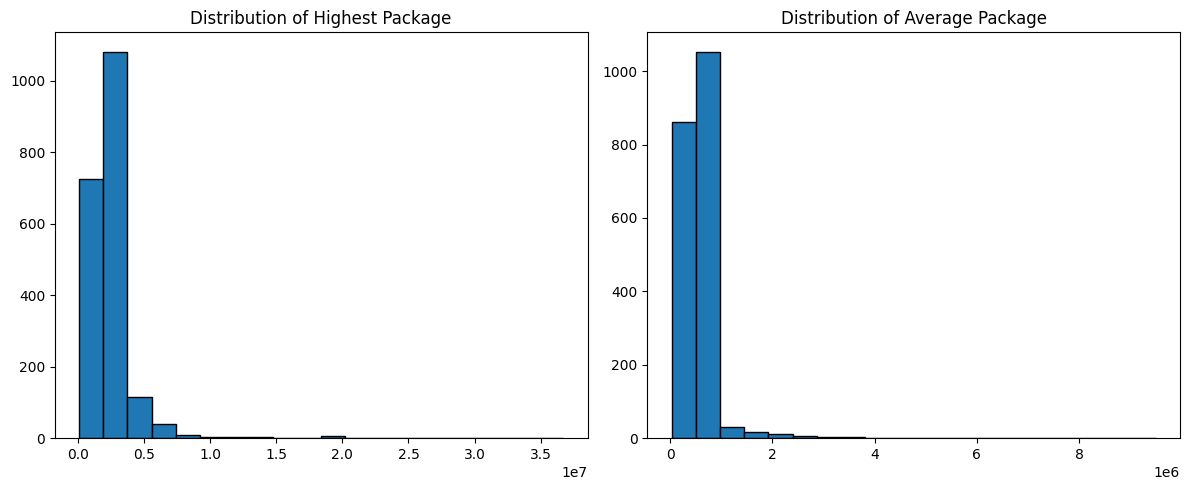

In [ ]:
import matplotlib.pyplot as plt
num_bins = 20
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram for 'Highest Package'
axes[0].hist(df['Highest Package'], bins=num_bins, edgecolor='k')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_title('Distribution of Highest Package')

# Plot the histogram for 'average package'
axes[1].hist(df['Average Package'], bins=num_bins, edgecolor='k')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('Distribution of Average Package')

plt.tight_layout()  # Ensure subplots don't overlap
plt.show()

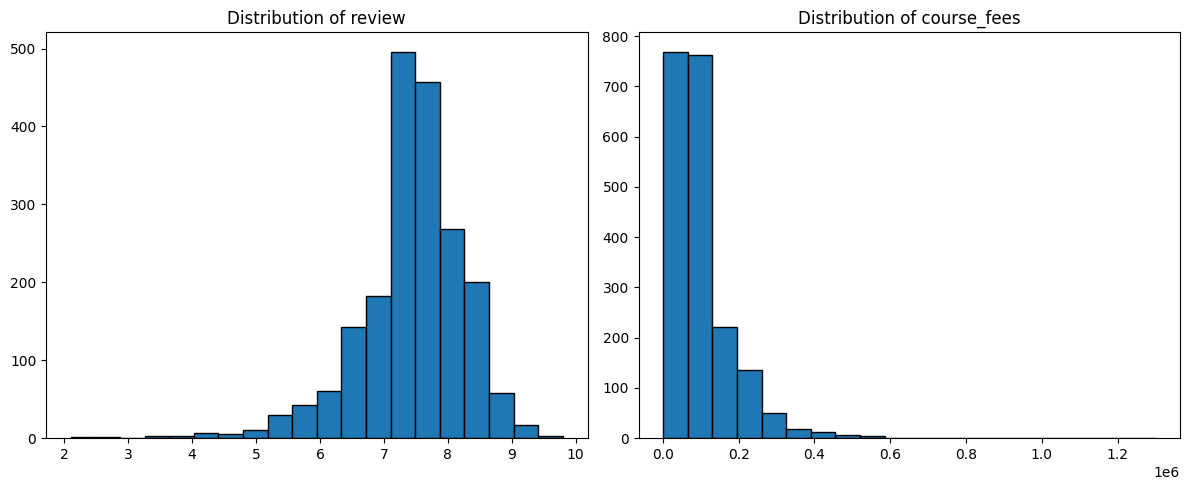

In [ ]:
num_bins = 20
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the histogram for 'review'
axes[0].hist(df['review'], bins=num_bins, edgecolor='k')
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_title('Distribution of review')

# Plot the histogram for 'course fees'
axes[1].hist(df['course_fees'], bins=num_bins, edgecolor='k')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('Distribution of course_fees')

plt.tight_layout()  # Ensure subplots don't overlap
plt.show()

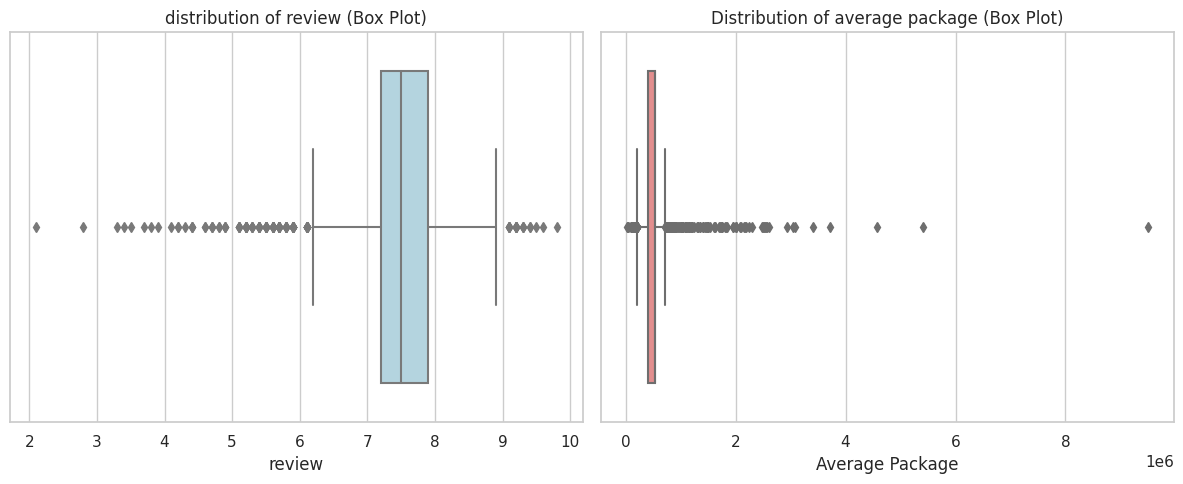

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='review', color='lightblue')
plt.title('distribution of review (Box Plot)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Average Package', color='lightcoral')
plt.title('Distribution of average package (Box Plot)')

plt.tight_layout()
plt.show()

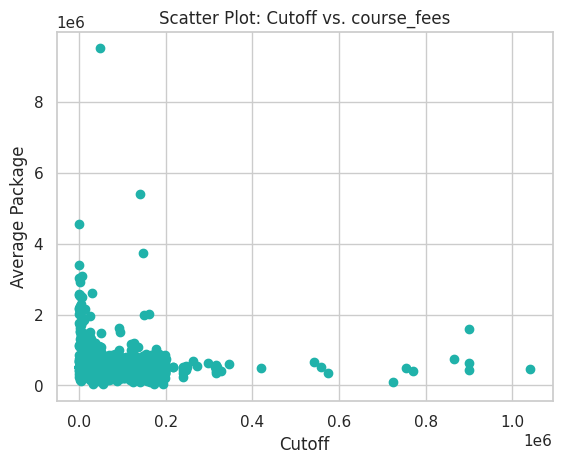

In [ ]:
plt.scatter(data=df, x='Cutoff rank in CSE', y='Average Package', color='lightseagreen')
plt.xlabel('Cutoff')
plt.ylabel('Average Package')
plt.title('Scatter Plot: Cutoff vs. course_fees')
plt.grid(True)  # Add a grid for reference

plt.show()

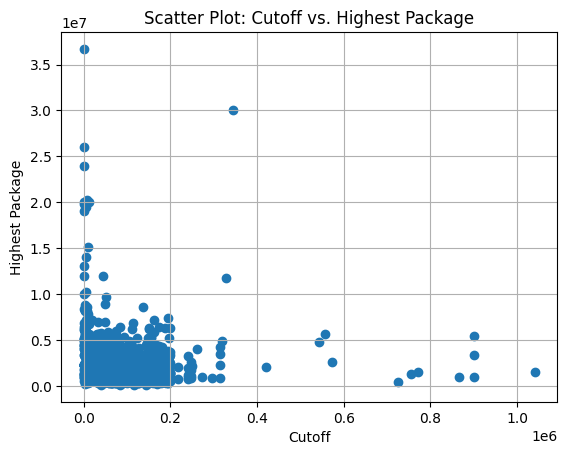

In [ ]:
plt.scatter(df['Cutoff rank in CSE'], df['Highest Package'])
plt.xlabel('Cutoff')
plt.ylabel('Highest Package')
plt.title('Scatter Plot: Cutoff vs. Highest Package')
plt.grid(True)  # Add a grid for reference

plt.show()

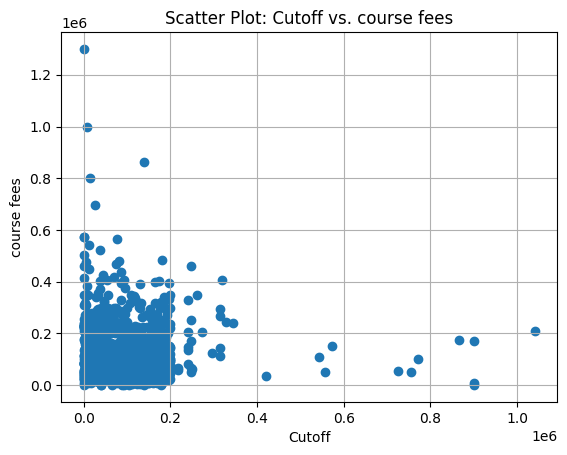

In [ ]:
plt.scatter(df['Cutoff rank in CSE'], df['course_fees'])
plt.xlabel('Cutoff')
plt.ylabel('course fees')
plt.title('Scatter Plot: Cutoff vs. course fees')
plt.grid(True)  # Add a grid for reference

plt.show()

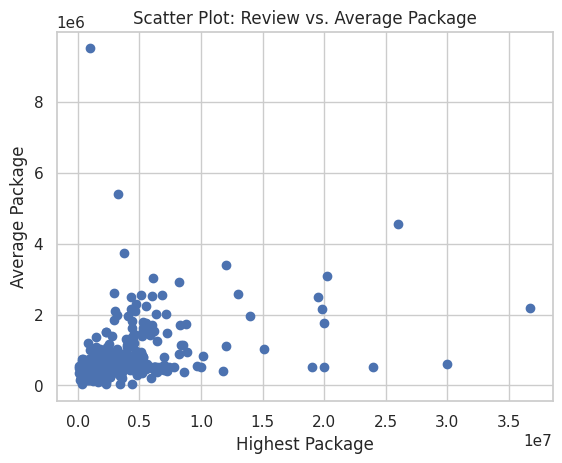

In [ ]:
plt.scatter(df['Highest Package'], df['Average Package'])
plt.xlabel('Highest Package')
plt.ylabel('Average Package')
plt.title('Scatter Plot: Review vs. Average Package')
plt.grid(True)  # Add a grid for reference

plt.show()

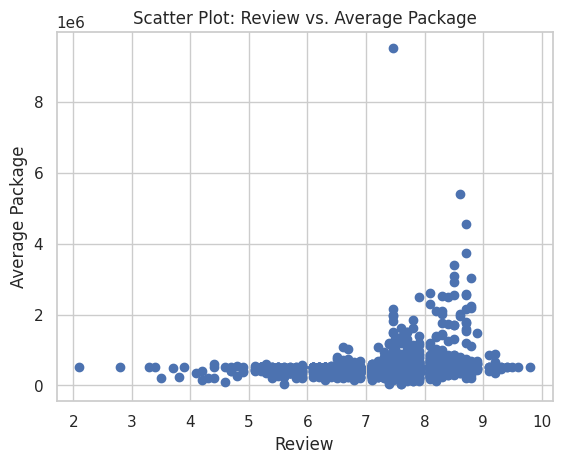

In [ ]:
plt.scatter(df['review'], df['Average Package'])
plt.xlabel('Review')
plt.ylabel('Average Package')
plt.title('Scatter Plot: Review vs. Average Package')
plt.grid(True)  # Add a grid for reference


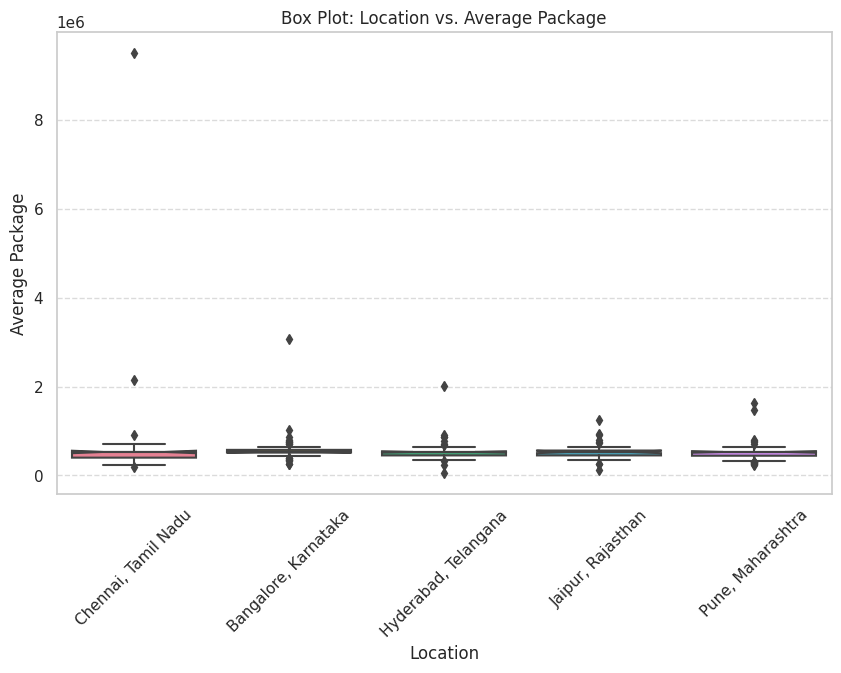

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a DataFrame called 'df'

# Limit the number of locations to display (e.g., top N locations with highest average package)
top_locations = df['location'].value_counts().nlargest(5).index.tolist()  # Define N as the number of locations to display

# Filter the DataFrame to include only the top N locations
df_filtered = df[df['location'].isin(top_locations)]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a custom color palette
custom_palette = sns.color_palette("husl", len(top_locations))

# Create the box plot with customizations
sns.boxplot(data=df_filtered, x='location', y='Average Package', palette=custom_palette, whis=1.5, notch=True)

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)  # Adjust the rotation angle as needed

plt.xlabel('Location')
plt.ylabel('Average Package')
plt.title('Box Plot: Location vs. Average Package')

plt.show()


Box plot for review vs highest college offered by the college to students.

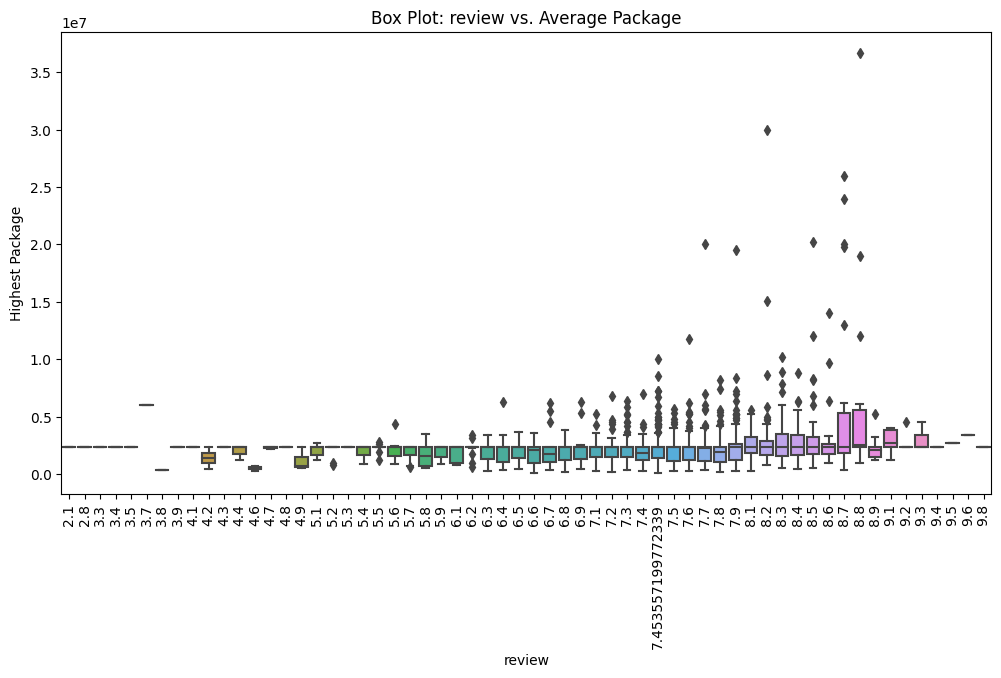

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Setting the figure size
plt.figure(figsize=(12, 6))

# Create the box plot
sns.boxplot(data=df, x='review', y='Highest Package')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

plt.xlabel('review')
plt.ylabel('Highest Package')
plt.title('Box Plot: review vs. Average Package')
plt.show()

Corelation Matrix Heatmap using seaborn

In [ ]:
#importing the library
import seaborn as sns

In [ ]:
#calculating the corelation of the column cutoff with other columns
corr_matrix = df.corr(numeric_only=True)
corr_matrix['Cutoff rank in CSE'].sort_values()

Average Package      -0.112263
Highest Package      -0.108567
course_fees          -0.071955
review               -0.022790
Cutoff rank in CSE    1.000000
Name: Cutoff rank in CSE, dtype: float64

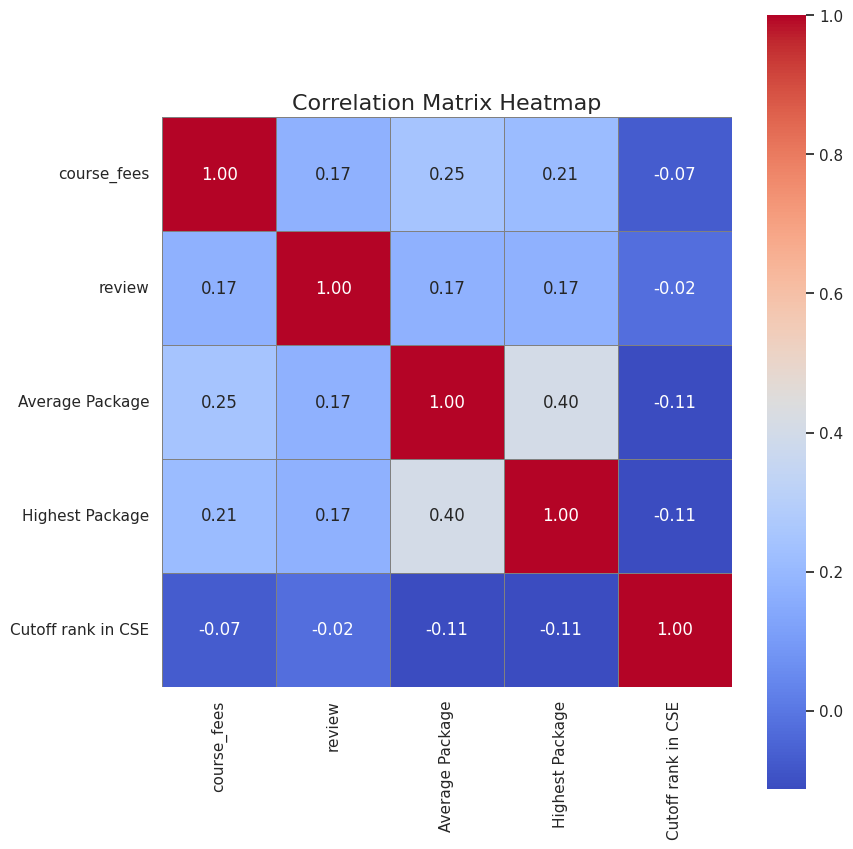

In [ ]:
#plotting the heatmap
plt.figure(figsize=(9, 9))
sns.set(font_scale=1)
sns.set_style('whitegrid')
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f', linewidths=0.5, linecolor='gray')

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

Bar plot for visualising the relationship between top locations and course fees of the college.



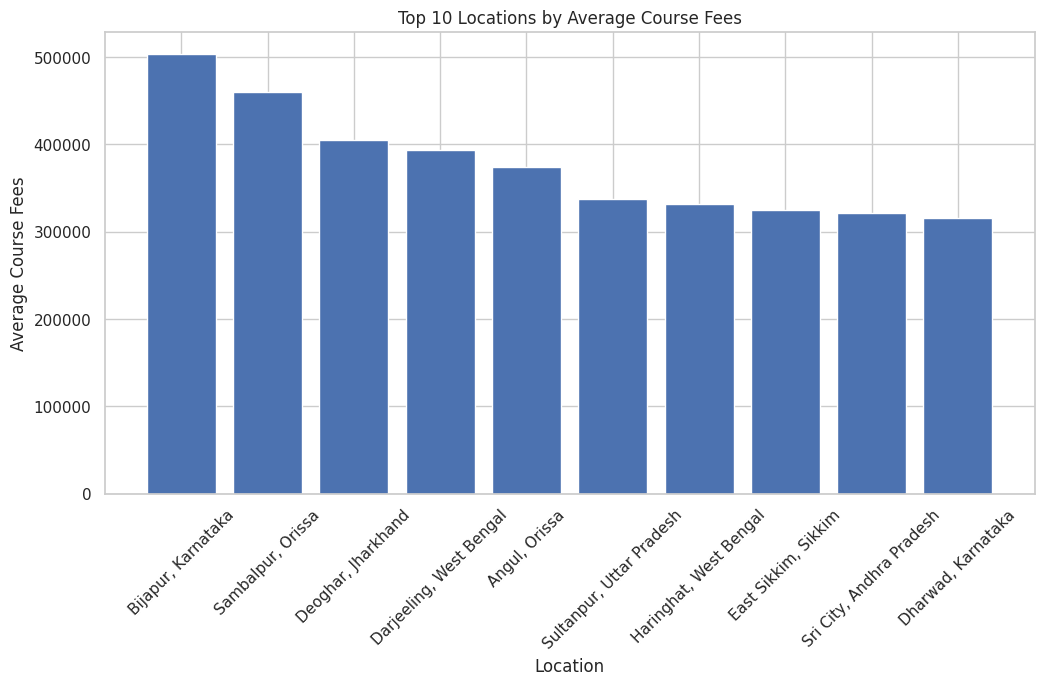

In [ ]:
# Group by 'location' and calculate the average course fees for each location
average_course_fees = df.groupby('location')['course_fees'].mean().reset_index()

# Select the top 10 locations with the highest average course fees
top_10_locations = average_course_fees.nlargest(10, 'course_fees')

# Create a bar plot to show the average course fees for the top 10 locations
plt.figure(figsize=(12, 6))
plt.bar(top_10_locations['location'], top_10_locations['course_fees'])
plt.xlabel('Location')
plt.ylabel('Average Course Fees')
plt.title('Top 10 Locations by Average Course Fees')
plt.xticks(rotation=45)

plt.show()


Reccomendation system using content based filtering

In [ ]:
college_data = df

def recommend_colleges(course_fee_max, review_score_min, average_package_min, highest_package, cutoff_rank, num_colleges):
    # Filter colleges based on the student's criteria
    filtered_colleges = college_data[
        (college_data["course_fees"] <= course_fee_max) &
        (college_data["review"] >= review_score_min) &
        (college_data["Average Package"] >= average_package_min) &
        (college_data["Highest Package"] >= highest_package) &
        (college_data["Cutoff rank in CSE"] >= cutoff_rank)
    ]

    # Display the recommended colleges, limiting to the specified number
    if not filtered_colleges.empty:
        print(f"Displaying the top {num_colleges} recommended colleges:")
        for index, college in filtered_colleges.head(num_colleges).iterrows():
            print(college["college_name"] + " located in  " + college["location"])
    else:
        print("No colleges match the specified criteria.")

# Input criteria from the student
course_fee_max = float(input("Enter maximum course fee: "))
review_score_min = float(input("Enter minimum review score: "))
average_package_min = float(input("Enter minimum average package: "))
highest_package = float(input("Enter highest package: "))
cutoff_rank = float(input("Enter CSE cutoff rank: "))

# Ask the user for the number of colleges to display
num_colleges_to_display = int(input("Enter the number of colleges you want to see: "))

# Recommend the colleges that match the entered criteria
recommend_colleges(course_fee_max, review_score_min, average_package_min, highest_package, cutoff_rank, num_colleges_to_display)

Enter maximum course fee: 200000
Enter minimum review score: 7.00
Enter minimum average package: 450000
Enter highest package: 2000000
Enter CSE cutoff rank: 5000
Enter the number of colleges you want to see: 10
Displaying the top 10 recommended colleges:
RNS Institute of Technology - [RNSIT], Bangalore located in  Bangalore, Karnataka
Parul University, Vadodara located in  Vadodara, Gujarat
Vellore Institute of Technology - [VIT University], Vellore located in  Vellore, Tamil Nadu
Jamia Millia Islamia University-[JMI], New Delhi located in  New Delhi, Delhi NCR
NIT Silchar, Silchar located in  Silchar, Assam
Sardar Vallabhbhai National Institute of Technology - [SVNIT], Surat located in  Surat, Gujarat
National Institute of Technology - [NIT], Hamirpur located in  Hamirpur, Himachal Pradesh
Maulana Azad National Institute of Technology  - [MANIT], Bhopal located in  Bhopal, Madhya Pradesh
National Institute of Technology - [NIT] Meghalaya, Shillong located in  Shillong, Meghalaya
Nati

In [ ]:
df